
<div dir="rtl">
    <h1>پروژه نهایی بیوانفورماتیک</h1>
    <h3>متینا مهدیزاده 97110347</h3>
<br>
    در ابتدا کتابخانه‌های لازم که لیست آنها در زیر آورده شده است را نصب می‌کنیم. سپس آنها را ادد کرده و شروع می‌کنیم.
</div>

In [4]:
install.packages(c("GEOquery", "limma", "pheatmap", "ggplot2", "gplots", "reshape2", "plyr"))
install.packages("BiocManager")
BiocManager::install("M3C")
BiocManager::install("GEOquery")

Warning message:
"packages 'GEOquery', 'limma' are not available (for R version 3.6.1)"


  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.3.3  3.3.5             FALSE

package 'pheatmap' successfully unpacked and MD5 sums checked
package 'gplots' successfully unpacked and MD5 sums checked
package 'reshape2' successfully unpacked and MD5 sums checked
package 'plyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\RtmpSwWyOW\downloaded_packages


installing the source package 'ggplot2'



In [21]:
library("Biobase")
library("GEOquery") 
library("limma")
library(ggplot2)
library(reshape2)
library(plyr)
library(M3C)

<div dir="rtl">
       <h2>آماده‌سازی داده</h2>
    <br>
      دیتاست استفاده شده در این پروژه دیتاست GSE48558 است.
     ابتدا داده‌های موجود در این دیتاست را با دستور زیر می‌گیریم و در gset می‌ریزیم. به دلیل اینکه این دیتاست‌ها از روش‌های مختلفی بدست می‌آیند در یک لیست هستند که هر مولفه‌ی آن دیتاستی است که با روش خاصی بدست آمده. ما مولفه‌ی اول را می‌خواهیم در نتیجه آن را از حالت لیست خارج کرده و به 
    ExpressionSet تبدیل می‌کنیم.
</div>

In [2]:
series <- "GSE48558"
gset <- getGEO(series, GSEMatrix =TRUE, AnnotGPL=TRUE, destdir = "Data/")
gset <- gset[[1]]

Found 1 file(s)
GSE48558_series_matrix.txt.gz
Using locally cached version: Data//GSE48558_series_matrix.txt.gz
Parsed with column specification:
cols(
  .default = col_double()
)
See spec(...) for full column specifications.
Using locally cached version of GPL6244 found here:
Data//GPL6244.annot.gz 


<div dir="rtl">
      در صورت سوال به ما گفته شده است که تنها داده‌هایی با 
    source name = AML Patient و phenotype = normal را میخواهیم از این رو این دو را نگه میداریم و دیتاست خود را به دیتا ستی تبدیل می‌کنیم که فقط شامل ردیف هایی باشد که شرط بالا را داشته باشند.
    همچنین gr را که همان گروه ما است برابر source name این ستون ها قرار می‌دهیم.
</div>

In [3]:
grT <- (gset@phenoData@data$source_name_ch1=="AML Patient") *2 + (gset@phenoData@data$`phenotype:ch1`=="Normal")
gr <- gset@phenoData@data$source_name_ch1[grT != 0]
gr2 <- grT[grT != 0]
groups <- (gset@phenoData@data$source_name_ch1=="AML Patient") + (gset@phenoData@data$`phenotype:ch1`=="Normal")
groups <- c(which(groups == 1))
ex <- exprs(gset)
ex <- ex[, groups]
dim(ex)

[1] 32321    67

In [4]:
head(ex)

,GSM1180750,GSM1180751,GSM1180752,GSM1180753,GSM1180754,GSM1180755,GSM1180756,GSM1180757,GSM1180758,GSM1180759,...,GSM1180910,GSM1180911,GSM1180912,GSM1180913,GSM1180914,GSM1180915,GSM1180916,GSM1180917,GSM1180918,GSM1180919
7892501,5.635547,4.916813,5.478152,5.596580,5.768478,6.847387,3.805093,6.656674,5.699819,6.239175,...,3.932742,4.323878,2.968024,5.390007,5.081234,5.040953,5.805522,4.749977,4.852069,5.396482
7892502,6.640414,5.838517,7.101921,5.190309,5.926461,7.883791,5.893643,6.656937,5.397055,7.649780,...,5.946217,5.856159,6.502668,5.193725,6.661025,6.491549,7.048769,5.781307,5.284680,5.924546
7892503,5.108161,5.953453,6.383739,3.696127,5.701286,5.718447,4.426680,4.329873,3.767084,6.662730,...,3.311391,4.031044,4.624519,3.376900,4.033916,2.982572,2.873971,3.242370,2.787703,3.941162
7892504,8.414047,9.026401,9.456269,8.746534,7.717569,7.526121,8.438070,7.896443,8.290602,9.262470,...,7.807354,6.787546,8.884012,7.775793,8.155603,8.199088,8.414432,8.493125,8.580799,8.335928
7892505,2.280691,2.423883,3.141614,2.105208,3.035931,3.692030,3.174492,2.914909,2.977506,3.141661,...,4.753101,4.569050,3.745585,4.488196,4.508322,4.128790,3.380764,3.741588,2.677907,3.626475
7892506,4.123770,5.783080,4.898264,5.199521,6.339047,6.029651,5.778521,5.361175,6.290925,6.018606,...,6.228638,6.403157,5.821390,7.213578,7.475160,7.044701,7.336019,7.230576,7.200788,7.312274


<div dir="rtl">
    <h2>کنترل کیفیت داده</h2>
    <br>
      در این قسمت سعی داریم کنترل داده‌ها را انجام دهیم. برای اینکار min و max داده‌ها را حساب می‌کنیم تا بررسی کنیم آیا نیاز به لوگاریتم گیری دارند یا خیر.
     از انجایی که مقدار مینیموم بزرگتر از صفر و مقدار ماکسیموم عدد بسیار بزرگی نیست می‌توان نتیجه گرفت نیازی به لوگاریتم گرفتن نداریم.
    <br>
    همچنین با کشیدن boxplot می‌فهمیم که چارک اول و سوم و همچنین میانه داده‌ها تقریبا یکسان هستند در نتیجه داده‌ها نیازی به نرمال سازی ندارند.
</div>

[1] 1.611473
[1] 13.76154


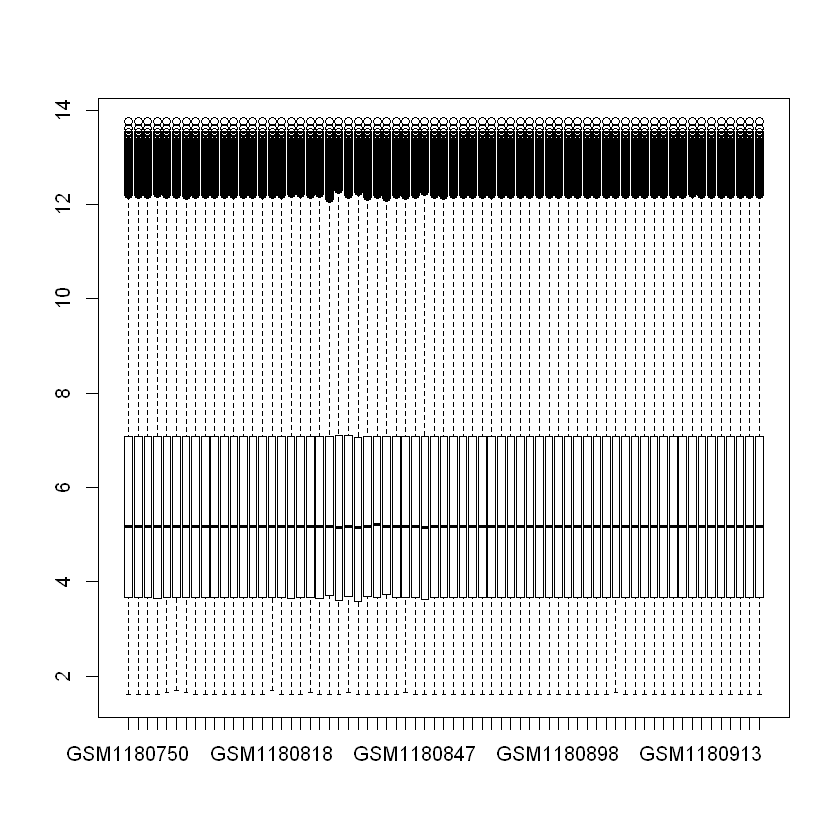

In [5]:
print(min(ex))
print(max(ex))
boxplot(ex)

<div dir="rtl">
     <h2>کاهش ابعاد داده</h2>
    <br>
      در این قسمت می‌خواهیم ابعاد داده را کاهش دهیم. برای این کار از روش pca استفاده می‌کنیم.
     در ابتدا باید بیان ژن ها را به تفاوت بیان ژن‌ها تبدیل کنیم. برای اینکار از scale استفاده می‌کنیم.
    سپس داده های scale شده را به تابع pca می‌دهیم و مولفه‌های اصلی را پیدا می‌کنیم. زمانی که نمودار مولفه ها را می‌کشیم می‌بینیم که از مولفه‌های دوم و سوم به بعد مقدار واریانس کم می‌شود و برای ما ارزشی ندارد. 
   به همین دلیل دو مولفه‌ی اول را نگه می‌داریم و نمودار بر حسب سطرهای داده را روی آن می‌کشیم.
    همانطور که مشاهده می‌شود این نمودار به شکل دایره است که نشان می‌دهد ژن هایی که تفاوت بیان دارند را بدست آورده ایم نه بیان هر ژن را.
</div>

In [19]:
dim(pc$x[, 1:2])

[1] 32321     2

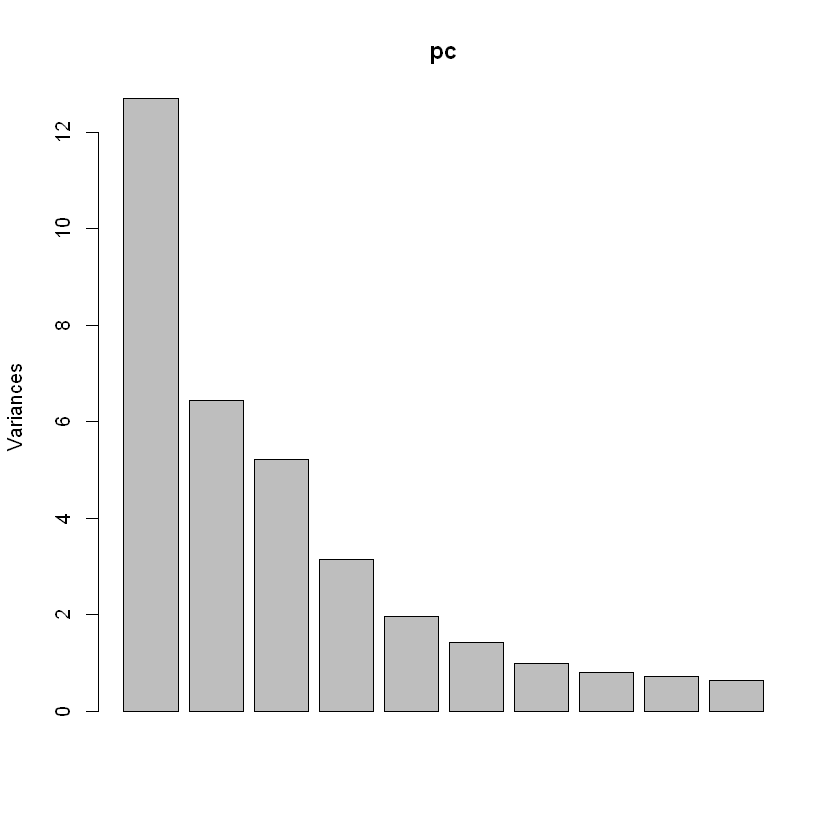

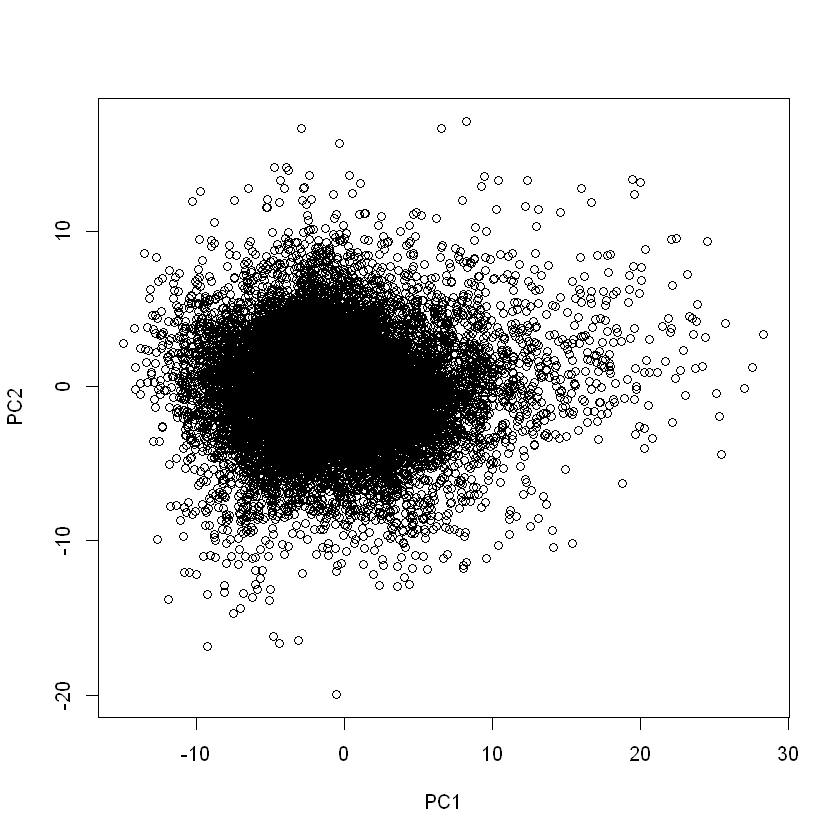

In [6]:
ex.scale <- t(scale(t(ex), scale=FALSE))
pc <- prcomp(ex.scale)
plot(pc)
plot(pc$x[,1:2])

<div dir="rtl">
     در این قسمت نمودار را روی گروه‌های مختلفی که داریم بعد از کاهش بعد می‌کشیم. مشاهده می‌کنیم که این داده ها روی دو بعد تا حدی جدا می‌شوند اما هنوز داده‌های سرطانی تا حدی پرت هستند.
</div>

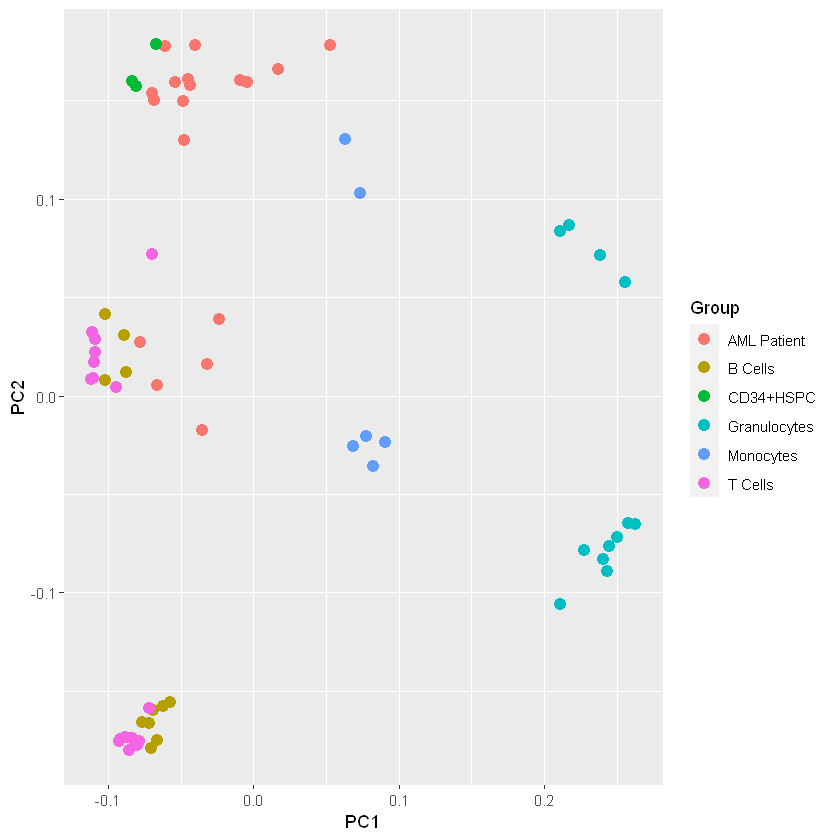

In [7]:
pcr <- data.frame(pc$rotation[, 1:3], Group=gr)
ggplot(pcr, aes(PC1, PC2, color=Group))+
geom_point(size=3)

<div dir="rtl">
      در این قسمت روش کاهش بعد بعدی را امتحان می‌کنیم. برای روش دوم از t-sne استفاده کردیم که یک روش احتمالاتی است که داده ها را با یک احتمالی به فضای دوبعدی می‌برد. این روش چون بر پایه‌ی احتمال و تابع توزیع t است نتیجه‌ی نسبتا بهتری از pca به ما می‌دهد در نتیجه برای قسمت بعد نیز از نتایج همین تابع استفاده شده است.
    <br>
    در ابتدا این روش روی 67 ستون اعمال شده و بعد آنها را کم کرده و نمایش داده است اما ما برای قسمت بعد می‌خواهیم که این کاهش بعد را روس سطر را بدهیم (چون نوشته شده بر حسب source name تفاوت و شباهت را متوجه شویم.)
    در نتیجه یکبار دیگر این تابع را صدا می‌کنیم اما اینبار دیگر ترانهاده ماتریس را نمیگیریم و اجازه می‌دهیم روی سطرها کاهش بعد را انجام دهد.
</div>

In [8]:
ts <- tsne(ex.scale ,labels=gr)
ts2 <- tsne((t(scale(ex,scale=F))) ,labels=gr)

***t-SNE wrapper function***
running...
done.
***t-SNE wrapper function***
running...
done.


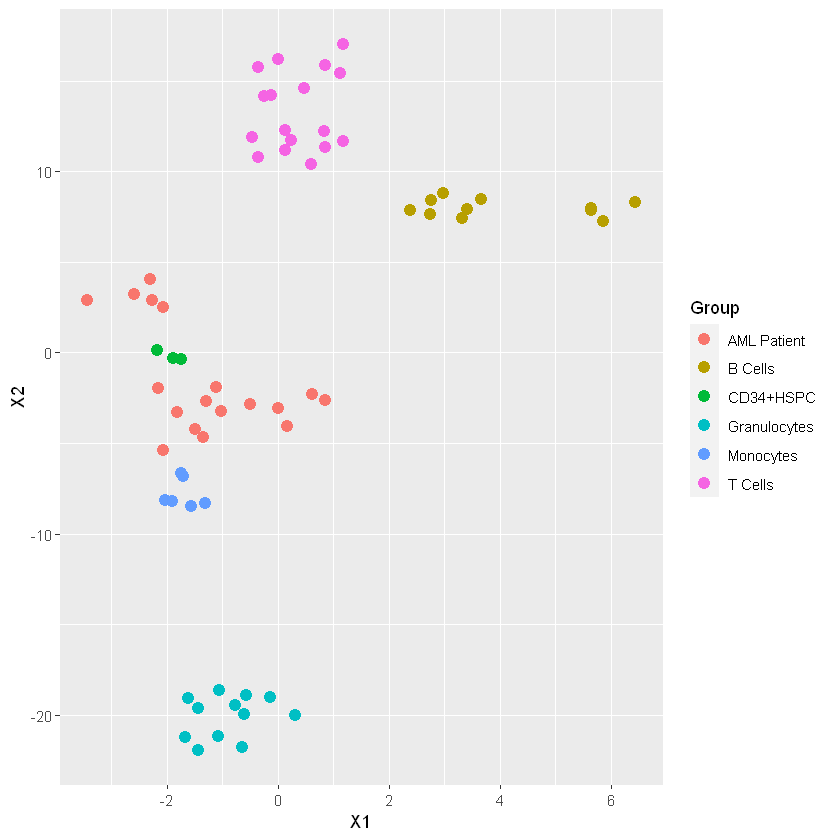

In [9]:
tsd <- data.frame(ts$data, Group=gr)
ggplot(tsd, aes(X1, X2, color=Group))+
geom_point(size=3)

<div dir="rtl">
    در این قسمت میانگین مجموع تفاوت ژن ها در یک سطر را بدست می‌آوریم و با توجه به آن تعدادی از سطرها که زیر میانگین هستند را حذف می‌کنیم تا بعد داده‌های ما کم شود و بتوانیم نمودار هیتمپ کشیده شده را بهتر بررسی کنیم.
</div>

In [10]:
mean(rowSums(abs(ts2$data)))
exred <- ex[rowSums(abs(ts2$data))>20,]
dim(exred)

[1] 15.19786

[1] 7221   67

<div dir="rtl">
      <h2>بررسی همبستگی بین نمونه ها</h2>
    <br>
در ادامه هیتمپ های گفته شده را میکشیم. اولین نمودار کشیده شده نمودار داده‌های کامل است و نمودار دوم نمودار داده هایی است که کاهش بعد داده شدند.
    می‌توان به وضوح مشاهده کرد که داده های سرطانی شباهت زیادی با هم ندارند اما داده های غیر سرطانی هر یک با گروه مربوط به خود کوریلیشن زیادی دارد. این به این دلیل است که سرطان ها به حودی خود بسیار متفاوت هستند و تفاوت میان آنها حتی از تفاوت میان دو سلول کاملا متفاوت انسان نیز بیشتر است. جال که این داده ها از روی بیماران مختلف نیز گرفته شده اند این شباهت کمتر نیز شده است.
    <br>
    با دقت کردن به این نمودار می‌توان متوجه شد که ارتباط میان گروه AML با افراد گروه CD34 از بقیه‌ی گروه ها بیشتر است.
    این موضوع را بعد از گاهش بعد هم می‌شد متوجه شد که در واقع دیدیم داده‌های گروه CD34 نزدیک به داده های گروه سرطانی افتادند.
</div>

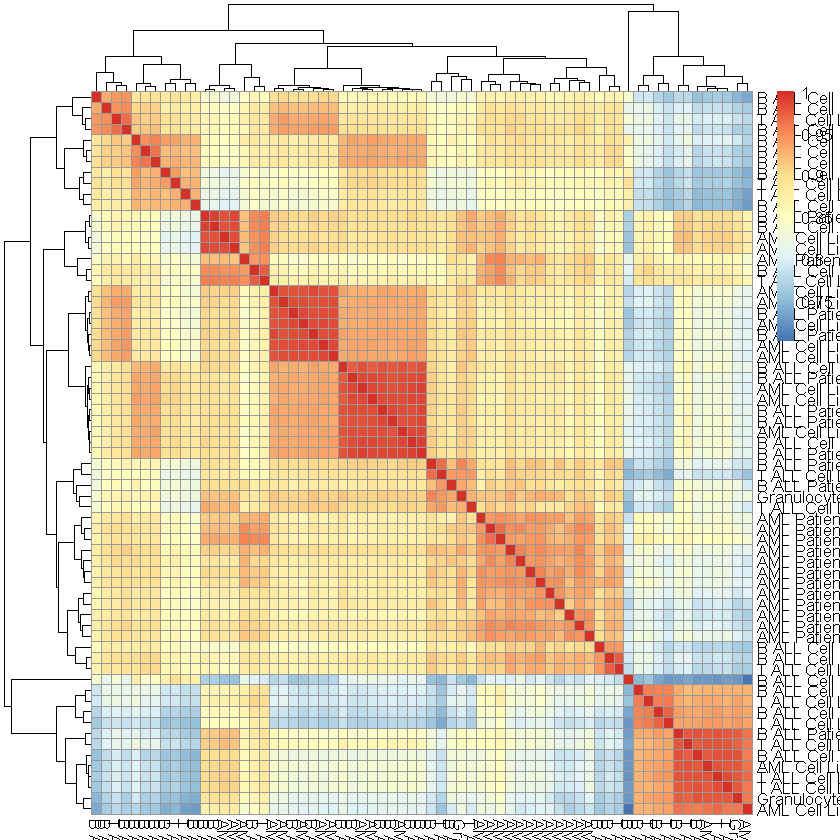

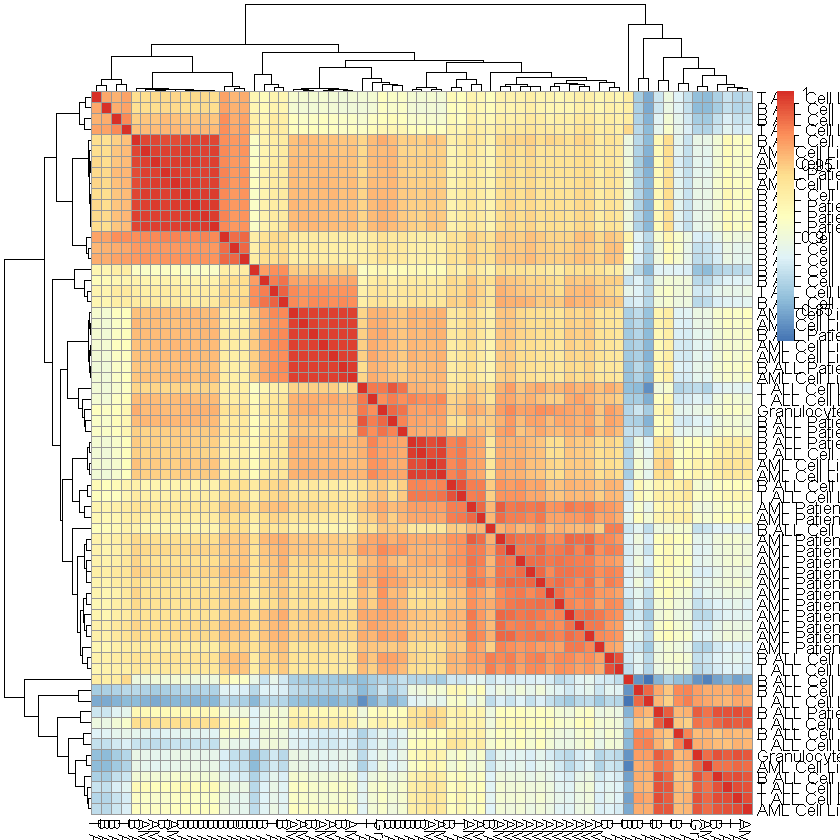

In [59]:
library(pheatmap)
pheatmap(cor(ex), labels_row = gset$source_name_ch1, labels_col = gset$source_name_ch1, width = 15, height = 15)
pheatmap(cor(exred), labels_row = gset$source_name_ch1, labels_col = gset$source_name_ch1, width = 15, height = 15)

<div dir="rtl">
        <h2>بررسی تمایز در بیان ژن ها</h2>
    <br>
      در این قسمت میخواهیم تمایز در بیان ژن ها را بررسی کنیم. برای این کار گروه های AML و CD34 را در نظر گرفتیم که بیشترین کوریلشن را با هم داشتند.
    سپس برخی از اسم ها را تغییر می‌دهیم تا فاصله بین آنها از بین برود.
    برای به دست آوردن تمایز میان ژن ها از پکیج lima استفاده می‌کنیم. این پکیج با استفاده از ماتریس design که نشان میدهد هر ژنی در کدام گروه است، یک خط از روی داده ها رد میکند که شیب این خط و فاصله ی تقاط تا این خط به ما t score ای را میدهد که با استفاده از p-value را محاسبه کنیم.
    <br>
    در صورت سوال گفته شده است که مقدار معنی دار را برابر با 0.05 در نظر بگیریم. این به این معنی است که ما برای ژن هایی که مقدار p-value کمتر از این را دارند تفاوت معناداری دارند.
    در نتیجه ژن ها را بسته به logFC آن به دو گروهی تقسیم میکنیم که اگر مقدار این لاگ بزرگ از 1 بود و p_value کوچکتر از 0.05 این ژن جزو ژن هایی است که در آن AML نسبت به CD34 مقدار بیشتری دارد. و برعکس اگر logFC کوچکتر از -1 , p_value کوچکتر از 0.05 بود این ژن جزو ژن هایی است که تفاوت معنی دار دارد و مقدار آن در گروه CD34 نسبت به گروه AML بیشتر است.
</div>

In [20]:
new_gset <- gset[,groups]
grT <- (new_gset@phenoData@data$source_name_ch1=="AML Patient") *2 + (new_gset@phenoData@data$source_name_ch1=="CD34+HSPC")
grT[grT == 2] <- "AML"
grT[grT == 1] <- "CD34"
grT[grT == 0] <- "OTHER"
grt <- factor(grT)
new_gset$description <- factor(grT)
design <- model.matrix(~ description + 0, new_gset)
colnames(design) <- levels(factor(grT))
fit <- lmFit(new_gset, design)
cont.matrix <- makeContrasts(AML-CD34, levels = design)
fit2 <- contrasts.fit(fit, cont.matrix)
fit2 <- eBayes(fit2, 0.01)
tT <- topTable(fit2, adjust = "fdr", sort.by = "B", number = Inf)
tT <- subset(tT, select=c("Gene.symbol","Gene.ID","adj.P.Val","logFC"))
head(tT)

,Gene.symbol,Gene.ID,adj.P.Val,logFC
8160088,MPDZ,8777,9.115680e-36,-3.670064
7910915,CHRM3,1131,5.113060e-27,-4.378570
8101284,PRKG2,5593,7.721826e-26,-5.874765
8160168,FREM1,158326,1.009376e-23,-3.409825
8121814,NKAIN2,154215,1.195924e-22,-4.673490
8139933,,,8.314452e-19,-2.676261


In [14]:
aml.up <- subset(tT, logFC > 1 & adj.P.Val < 0.05)
aml.up.genes <- unique(as.character(strsplit2(aml.up$Gene.symbol, "///")))
write.table(aml.up.genes,file = "Data/AML_UP.txt", quote = F, col.names = F, row.names = F)

aml.down <- subset(tT, logFC < -1 & adj.P.Val < 0.05)
aml.down.genes <- unique(as.character(strsplit2(aml.down$Gene.symbol, "///")))
write.table(aml.down.genes,file = "Data/AML_DOWN.txt", quote = F, col.names = F, ,row.names = F)

<div dir="rtl">
        <h2>آنالیز ontology gene و pathway ها</h2>
    <br>
      در این قسمت با استفاده از سایت enrichr ژن های بدست آمده در دو نمونه را وارد میکنیم و pathway و antonogy آن ها را در دو دیتاست GO Biological Process 2021 و 
KEGG 2021 Human بررسی میکنیم.
    <br>
    تصویر اول مربوط به آنتولوژی ژن هایی است که در نمونه های بیمار بیشتر از نمونه های سالم بوده اند.
    با توجه به این جدول متوجه میشویم که کمترین میزان p_value مربوط به پروسه mitotic cytokinesis است که در واقع پروسه ای است که در آن سلول شروع به تقسیم شدن می‌کند.
</div>

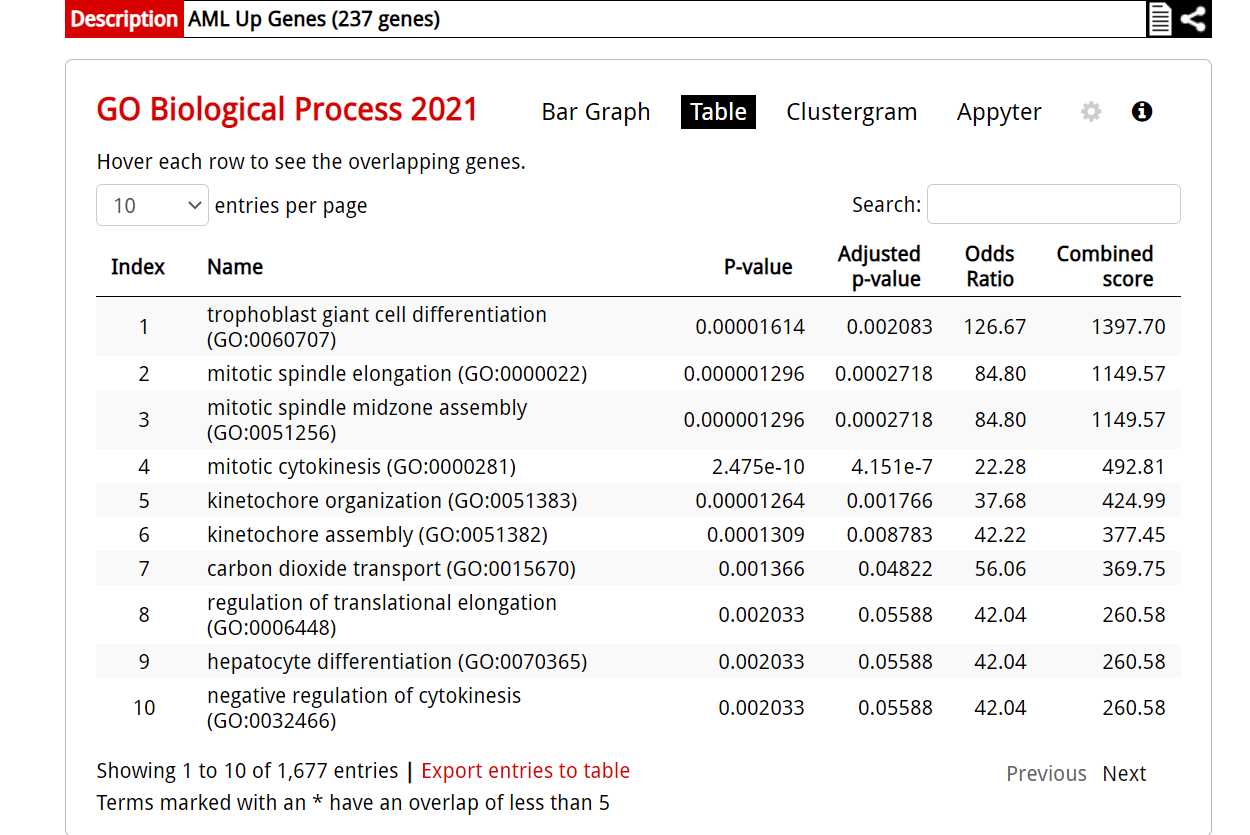

<div dir="rtl">
     تصویر دوم مربوط به pathway ژن هایی است که در بیماران سرطانی بیشتر از بیماران سالم وجود دارد.
    در این دیتاست کمترین p_value مربوط به cell cycle است که مربوط به چرخه ی سلولی است. از آنجایی که در سرطان تقسیم بیش از اندازه سلولی رخ میدهد واضح است که مسیر آن مربوط به چرخه سلولی نیست باید باشد.
</div>

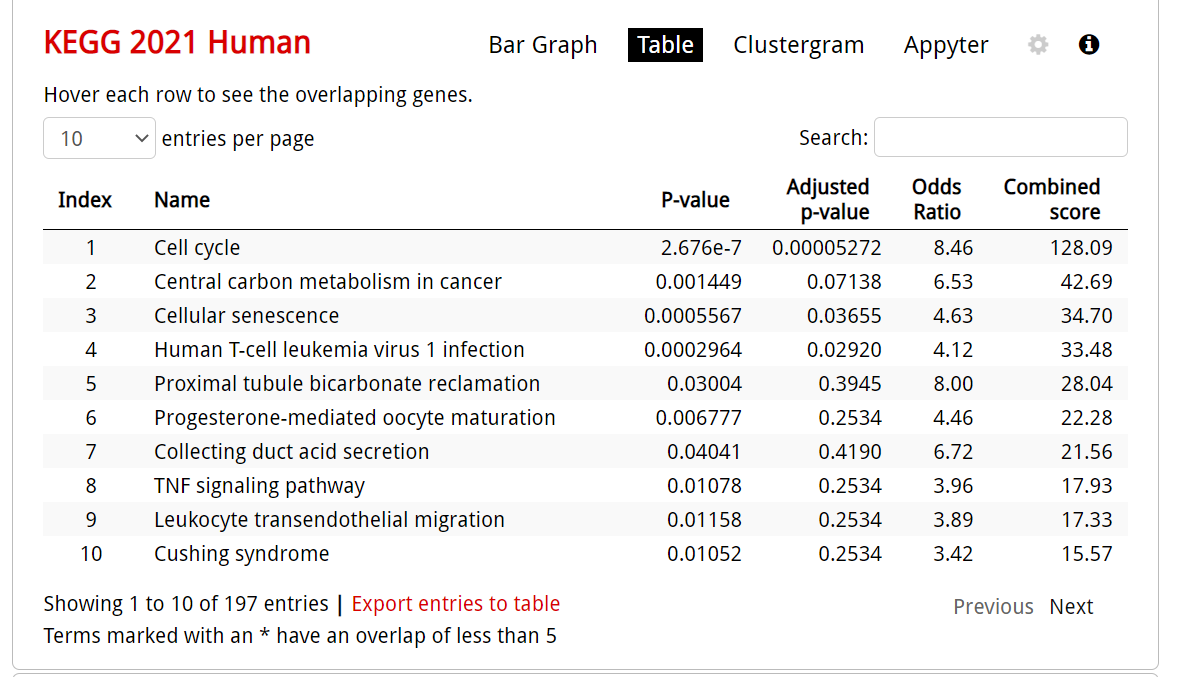

<div dir="rtl">
    تصویر اول مربوط به آنتولوژی ژن هایی است که در نمونه های بیمار کمتر از نمونه های سالم بوده اند.
    با توجه به این جدول متوجه میشویم که کمترین میزان p_value مربوط به پروسه activation of GTPase activity است که در واقع پروسه ای است که در آن 
    پروتئین های GTPase-activating فعال میشوند. این پروتئین ها وظیفه ی این را دارند که سیگنال مربوط به انجام یک پروسه خاص (در این مورد تقسیم سلولی) را متوقف کنند در نتیجه واضح است که این پروسه در افراد سرطانی کمتر از افراد سالم انجام می‌شود.
</div>

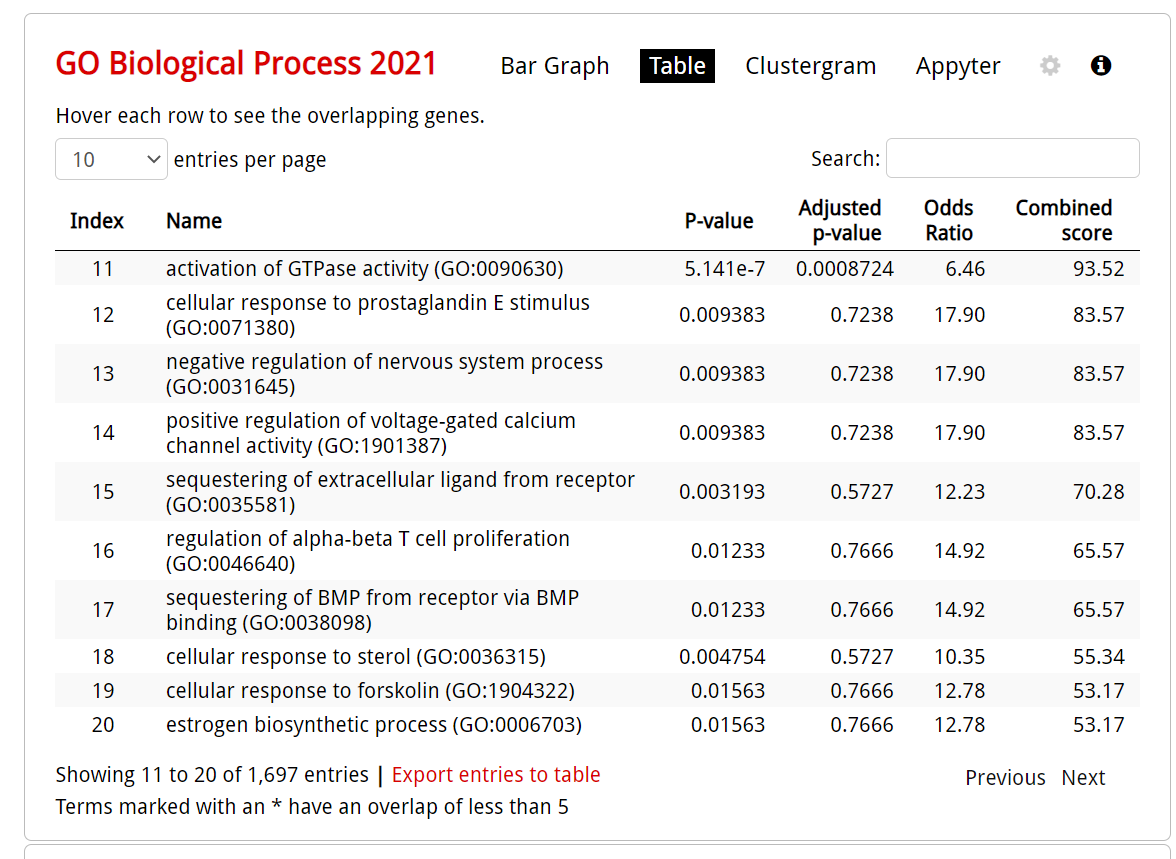

<div dir="rtl">
     تصویر دوم مربوط به pathway ژن هایی است که در بیماران سرطانی کمتر از بیماران سالم وجود دارد.
    در این دیتاست کمترین p_value مربوط به progesterone-mediated oocyte maturation است 
    .
</div>

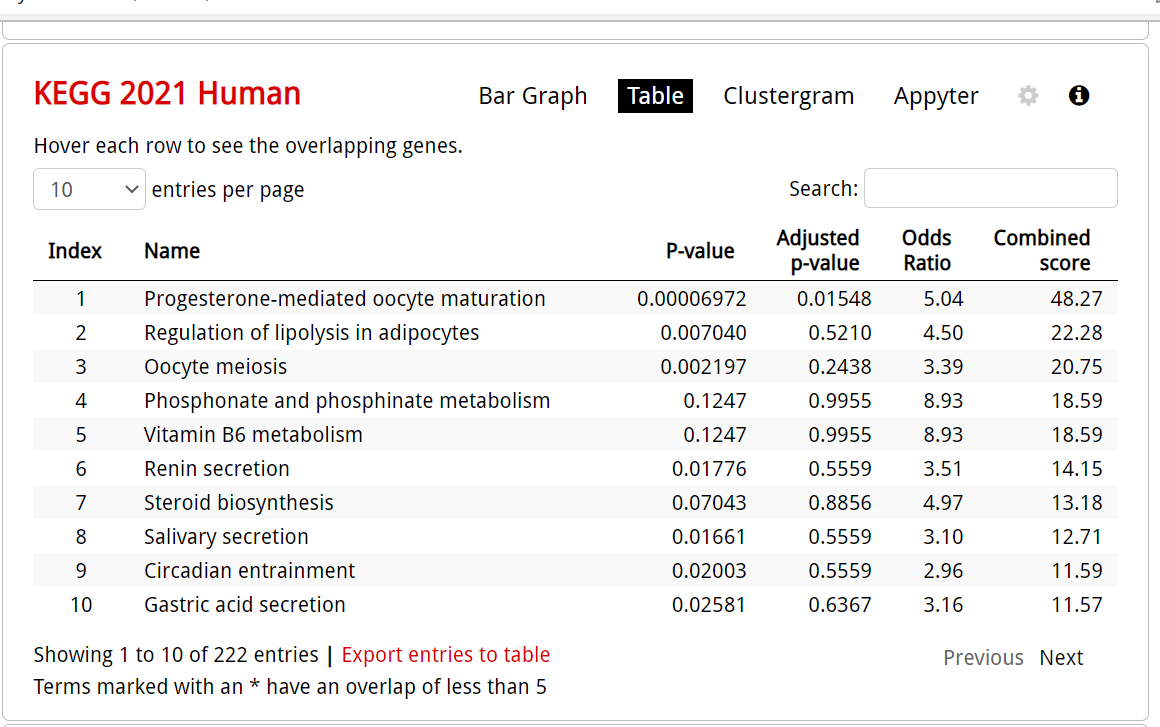

<div dir="rtl">
    <h2>موارد امتیازی دیگر</h2>
    <br>
برای هر یک از pathway ها و biological process های یافته شده میتوان با جست و جو مقالاتی مرتبط با AML و
این موضوع یا چیزی مرتبط به این موضوع یافت.
    <br>
مثلا در قسمت اول بررسی، در pathway میتوانیم ببینیم یک ژن مهم در pathway ژن FLT3 است و میتوانیم
با جستوجو ببینیم که این ژن در درصد بالایی از مبتلایان AML دچار جهش میشود و نوعی از AML بر حسب جهش
این ژن داریم. در کل هم این pathway مربوط به lineage سلولهای Hematopoietic است که سلولهای بنیادی
خونی هستند در تحقیقات میتوان دید که تغییرهای ایجاد شده در یک lineage از این سلولها باعث AML هستند.
    <br>
  همچنان با بررسی 
    مقاله دوم میتوان مشاهده کرد که ژن TBC1D16 که در انتولوژی دوم به آن رسیدیم در بیماران لوکومیا کاهش پیدا می‌کند که در واقع نتایج بدست امده ما را تایید می‌کند.
   <br>
    ژن دیگری که در انتولوژی اول مشاهده کردیم ژن ANLN بود که طبق مطالب نوشته شده دو رفرنس سوم در ابندا منجر به پیشرفت میلوفیبروز اولیه (PMF) و در نهایت تبدیل شدن به لوکومیای حاد می‌شود.
    <br>
    در بخش بعدی که pathway ی به عنوان Cholesterol biosynthesis Homo sapiens داریم هم، با جست و جو در نتایج
موجود میتوان دید که در نمونههای AML به عنوان ماکانیزمی دفاعی میزان کلسترول به طور غیرطبیعی افزایش دارد و به این
pathway مرتبط است.
     و یا همانطور که اشاره شد pathway فعال کردن GTPaste که پروتئینی است که میتواند یک فعالیت خطرناک را به موقع خاموش کند در بیماران سرطانی کم می‌شود.
    <br>
    یا به عنوان مثال طبق مقالات یافت شده Retinoblastoma Gene نیز یکی از ژن هایی است که در افراد سالم وجود دارد و در بیماران سرطانی خیر گه این هم در pathway دوم ما پیدا شده بود.
<div>

<div dir="rtl">
یکی از نمونه داروهایی که در برای این نوع سرطان وجود دارد داروی Midostaurin است که کار این است که با متوقف کردن ژن FLT3 که در قسمت قبل به آن اشاره شد و برخی دیگر از پروتئین ها که به رشد سلول کمک میکنند، فرایند پیشرفت سرطان را آهسته می‌کند
<br>
    Gilteritinib داروی دیگری است که بر روی ژن FLT3 اثر میگذارد و آن را متوقف میکند.
    <br>
    داروی بعدی دارویی است که روی IDH1, IDH2 اثر میگذارد که این هم جزو ژن هایی بودند که در بیماران سرطانی فرق داشتند. این ژن ها در بیماران مبتلا به لوکومیا جهش پیدا میکنند و داروی 
     IDH inhibitors میتواند این پروتئین ها را متوقف کند و سلول را کم کم به سلول بالغ تبدیل کند که نیازی به تقسیم ندارد.
<div>

<div dir="rtl">
تحلیل اضافه ای که با توجه به این دیتاست به ذهن من این رسید این نکته بود که دو گروه بیماران AML به نظر از یگدیگر جدا می‌آمدند. این میتواند به این معنی باشد که این بیماری خود به دو نوع بیماری متفاوت تبدیل میشود که با جدا کردن این دو دسته از هم و بررسی جداگانه آنها شاید حتی بتوانیم در آینده به تحلیل های دقیق تری از این بیماری برسیم.
<div>

<h1>منابع</h1>
    
[1] https://www.healthline.com/health/aml/flt3-mutation

[2] https://pubmed.ncbi.nlm.nih.gov/33476656/

[3] https://www.tandfonline.com/doi/full/10.1080/10245332.2018.1482051

[4] https://www.cancer.org/cancer/acute-myeloid-leukemia/treating/targeted-therapy.html#:~:text=In%20some%20people%20with%20AML,treat%20some%20of%20these%20leukemias.

[5] https://jhoonline.biomedcentral.com/articles/10.1186/s13045-021-01184-1#:~:text=GTPase%2Dactivating%20protein%20(GAP),in%20various%20cell%20requirement%20processes.